In [479]:
## 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 전처리
from sklearn.preprocessing import StandardScaler

## 스케일러
from sklearn.preprocessing import MinMaxScaler

## 모델 구축
from sklearn.cluster import KMeans

In [480]:
df_1 = pd.read_csv('전처리_최종.csv', encoding='euc-kr')
df_1.head()

,연번,업무건물,영업건물,주거건물,대중집합건물,기타건물,대전지하철역,사고량,타슈이용량,총이용승객,정류장개수,경제인구수,교통량,하천여부
0,1,1,1,1,6,1,0,0,7727,113755,5,228,361160,1
1,2,2,1,1,6,1,0,0,10660,293801,6,508,361160,1
2,3,1,1,1,8,1,0,0,53185,0,0,0,0,0
3,4,13,38,32,2,1,0,0,11007,1862557,2,5271,1853738,0
4,5,1,1,10,5,1,0,0,9109,87367,2,726,522884,0


In [481]:
df_1.shape

(262, 14)

In [482]:
df_1.keys()

Index(['연번', '업무건물', '영업건물', '주거건물', '대중집합건물', '기타건물', '대전지하철역', '사고량',
       '타슈이용량', '총이용승객', '정류장개수', '경제인구수', '교통량', '하천여부'],
      dtype='object')

In [483]:
## 전처리 작업

In [484]:
columns = ['주거건물', '기타건물',' 총이용승객',' 경제인구수','하천여부']
columns

['주거건물', '기타건물', ' 총이용승객', ' 경제인구수', '하천여부']

In [485]:
labels = np.array(df_1['연번'])
labels

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [486]:
df_2 = df_1.drop(['연번','정류장개수','영업건물','대중집합건물', '사고량','업무건물','대전지하철역' ,'타슈이용량' ,'교통량'], axis=1)
df_2

,주거건물,기타건물,총이용승객,경제인구수,하천여부
0,1,1,113755,228,1
1,1,1,293801,508,1
2,1,1,0,0,0
3,32,1,1862557,5271,0
4,10,1,87367,726,0
...,...,...,...,...,...
257,1,1,131031,0,0
258,1,1,323753,0,0
259,76,25,1074721,751,1
260,11,1,17757,346,0


In [487]:
## 수치형 데이터 표준화

In [488]:
stdsc = MinMaxScaler()
df_3 = pd.DataFrame(stdsc.fit_transform(df_2))

In [489]:
df_3.index = labels
df_3.columns = columns

In [490]:
## 연번 레이블 연결

In [491]:
df_3

,주거건물,기타건물,총이용승객,경제인구수,하천여부
1,0.000000,0.000000,0.013648,0.023418,1.0
2,0.000000,0.000000,0.035249,0.052177,1.0
3,0.000000,0.000000,0.000000,0.000000,0.0
4,0.040365,0.000000,0.223464,0.541393,0.0
5,0.011719,0.000000,0.010482,0.074569,0.0
...,...,...,...,...,...
258,0.000000,0.000000,0.015721,0.000000,0.0
259,0.000000,0.000000,0.038843,0.000000,0.0
260,0.097656,0.315789,0.128942,0.077136,1.0
261,0.013021,0.000000,0.002130,0.035538,0.0


In [492]:
## 군집화

In [493]:
## n_cluster 2개부터 시작해야함(원하는 결과가 나올때 까지)
km = KMeans(n_clusters=7,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=1)

y_km = km.fit_predict(df_3)

In [494]:
y_km

array([1, 1, 0, 4, 0, 4, 0, 4, 4, 1, 4, 6, 4, 6, 2, 4, 6, 0, 2, 4, 0, 0,
       1, 0, 0, 0, 0, 0, 5, 0, 1, 1, 5, 4, 4, 4, 5, 5, 1, 3, 3, 3, 4, 0,
       5, 4, 2, 0, 4, 4, 5, 3, 2, 2, 2, 2, 6, 0, 6, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 4, 4, 4, 3, 3, 4, 4, 3, 3, 2, 2, 4, 5, 4, 3, 4, 4, 3,
       4, 5, 2, 3, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 3,
       5, 4, 5, 5, 3, 2, 2, 6, 3, 3, 3, 3, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1,
       3, 2, 2, 2, 4, 2, 2, 2, 3, 2, 6, 1, 1, 2, 0, 4, 4, 2, 3, 6, 3, 3,
       2, 3, 3, 0, 2, 0, 2, 4, 4, 0, 4, 2, 6, 3, 0, 2, 4, 3, 2, 2, 4, 2,
       4, 4, 0, 4, 2, 0, 0, 3, 3, 0, 1, 4, 2, 2, 3, 3, 3, 3, 3, 0, 3, 3,
       2, 0, 2, 4, 0, 2, 0, 0, 3, 2, 2, 1, 3, 2, 2, 4, 4, 2, 5, 2, 3, 5,
       3, 4, 2, 1, 3, 0, 0, 2, 0, 2, 0, 0, 1, 2, 3, 3, 3, 3, 4, 4, 1, 4,
       2, 3, 3, 2, 3, 3, 4, 0, 4, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2])

In [495]:
cluster = pd.DataFrame(y_km)

In [496]:
cluster.index = labels
cluster.columns = ['cluster']

In [497]:
cluster

,cluster
1,1
2,1
3,0
4,4
5,0
...,...
258,0
259,0
260,1
261,0


In [498]:
## 엘보우 차트

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


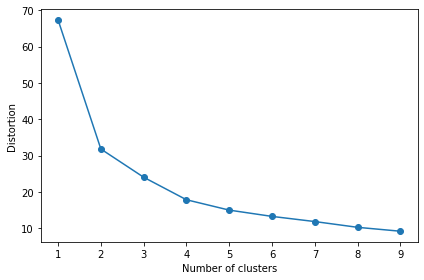

In [499]:
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(df_3)
    distortions.append(km.inertia_)
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [500]:
distortions

[67.39552590339412,
 31.791818922512956,
 24.00566613452896,
 17.796202439487658,
 14.938939930230411,
 13.205598886821127,
 11.782670216995756,
 10.192526124826573,
 9.117392625393196]

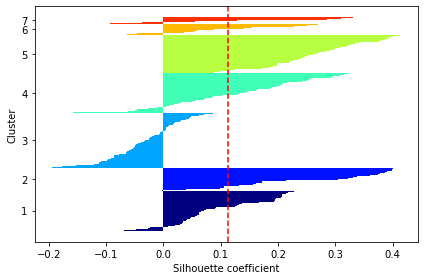

In [501]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
            edgecolor='none', color=color)
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [502]:
df_result = df_1.set_index('연번')
df_result

,업무건물,영업건물,주거건물,대중집합건물,기타건물,대전지하철역,사고량,타슈이용량,총이용승객,정류장개수,경제인구수,교통량,하천여부
연번,,,,,,,,,,,,,
1,1,1,1,6,1,0,0,7727,113755,5,228,361160,1
2,2,1,1,6,1,0,0,10660,293801,6,508,361160,1
3,1,1,1,8,1,0,0,53185,0,0,0,0,0
4,13,38,32,2,1,0,0,11007,1862557,2,5271,1853738,0
5,1,1,10,5,1,0,0,9109,87367,2,726,522884,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,12,1,1,1,1,0,0,2199,131031,2,0,0,0
259,8,1,1,1,1,0,0,3210,323753,2,0,0,0
260,2,138,76,1,25,0,7,4465,1074721,5,751,1793346,1


In [503]:
df_result2 = pd.concat([df_result,cluster],axis=1, ignore_index=False)
df_result2

,업무건물,영업건물,주거건물,대중집합건물,기타건물,대전지하철역,사고량,타슈이용량,총이용승객,정류장개수,경제인구수,교통량,하천여부,cluster
1,1,1,1,6,1,0,0,7727,113755,5,228,361160,1,1
2,2,1,1,6,1,0,0,10660,293801,6,508,361160,1,1
3,1,1,1,8,1,0,0,53185,0,0,0,0,0,0
4,13,38,32,2,1,0,0,11007,1862557,2,5271,1853738,0,4
5,1,1,10,5,1,0,0,9109,87367,2,726,522884,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,12,1,1,1,1,0,0,2199,131031,2,0,0,0,0
259,8,1,1,1,1,0,0,3210,323753,2,0,0,0,0
260,2,138,76,1,25,0,7,4465,1074721,5,751,1793346,1,1
261,1,5,11,1,1,0,0,1866,17757,4,346,696365,0,0


In [504]:
df_result2.to_csv('군집분석.csv', encoding='ANSI')